# Comparing Keras vs Tensor Flow with Convolution on the Same Problem

---

Using the MNIST digit recognition dataset from the Kagel Competition on Digit Recognition, model the same problem in both Keras and TensorFlow, hopefully get the similar output, and time the routines to see which is faster.  I assume the pure TensorFlow without Keras is faster as it will have less overhead to run.

In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


%matplotlib inline

In [25]:
df = pd.read_csv('./data/train.csv')
X_kaggle = pd.read_csv('./data/test.csv')

In [26]:
X = df.drop('label', axis = 1)
y = df['label']
X /= 255                       # Unitize values per instructions
y = to_categorical(y)

In [27]:
X_kaggle /= 255

In [28]:
df[0:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y[0:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
X[0:10]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


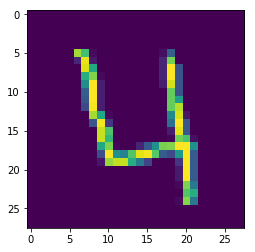

In [31]:
plt.imshow(X.iloc[3].values.reshape(28, 28))

In [32]:
y[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
list(y[3]==max(y[3])).index(True)

4

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35)


---

### Keras Model with Convolution

In [35]:
# Need to reshape values for Convolution layers
X_train = X_train.values.reshape(X_train.shape[0],        # number of observations
                          28,                      # 28 by 28 pixel image
                          28, 
                          1)                       # grayscale so only one depth

X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [36]:
import time
begin_time = time.time()

model = Sequential()

model.add(Conv2D(filters = 32,      # number of filters to be used
                kernel_size = 5,   # filters are 3x3
                activation = 'relu',
                input_shape = (28, 28, 1),
                padding = 'same'
                ))

model.add(MaxPooling2D(pool_size = (2,2), strides=2))      # pooling filter is 2x2
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Flatten())


model.add(Dense(128, activation = 'relu', input_dim=X_train.shape[1]))
model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose = 1)
print('time to complete = ', time.time() - begin_time, ' seconds.')

Train on 27300 samples, validate on 14700 samples
Epoch 1/10
27300/27300 [==============================] - 21s 777us/step - loss: 0.3029 - acc: 0.9045 - val_loss: 0.0748 - val_acc: 0.9781
Epoch 2/10
27300/27300 [==============================] - 22s 796us/step - loss: 0.1054 - acc: 0.9690 - val_loss: 0.0584 - val_acc: 0.9816
Epoch 3/10
27300/27300 [==============================] - 23s 836us/step - loss: 0.0774 - acc: 0.9759 - val_loss: 0.0563 - val_acc: 0.9832
Epoch 4/10
27300/27300 [==============================] - 23s 832us/step - loss: 0.0616 - acc: 0.9814 - val_loss: 0.0422 - val_acc: 0.9875
Epoch 5/10
27300/27300 [==============================] - 21s 784us/step - loss: 0.0508 - acc: 0.9839 - val_loss: 0.0419 - val_acc: 0.9876
Epoch 6/10
27300/27300 [==============================] - 22s 805us/step - loss: 0.0460 - acc: 0.9854 - val_loss: 0.0374 - val_acc: 0.9889
Epoch 7/10
27300/27300 [==============================] - 23s 834us/step - loss: 0.0368 - acc: 0.9885 - val_loss: 0.

### Function for Kaggle Submission Creation
The following fuction inputs a test file, a model, and parameters for an outfile name.  
The function then creates predictions, converts the predictions to categorical values, and then writes all of this out to a csv in the *output* directory.  
This function can be used for the Keras models.

In [37]:
def create_kaggle_out(X_in, model_in = model, out_path= './output/', out_name = 'kagout', stamp = '99'):
    df_out = pd.DataFrame({
        'ImageID':range(1, 1+len(X_in)),
        'Label':model.predict(X_in).argmax(axis=1)
    })
    df_out.to_csv(out_path+out_name+stamp+'.csv', index=False)
    return

In [38]:
create_kaggle_out(X_kaggle.values.reshape(X_kaggle.shape[0], 28, 28, 1), model_in = model, stamp = '_ker_blog')

### TensorFlow with Convolution Layers


In [40]:
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28, 28,1)

In [41]:
X_kaggle_reshaped = X_kaggle.values.reshape(-1, 28, 28, 1)

In [42]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 28,28,1))
y = tf.placeholder(dtype=tf.float32, shape=(None, 10))

c1 = tf.layers.conv2d(X, filters=32, kernel_size=[5, 5], activation=tf.nn.relu, padding='same')
p1 = tf.layers.max_pooling2d(c1, pool_size=[2, 2], strides=2)
c2 = tf.layers.conv2d(p1, filters=64, kernel_size=[5,5], activation = tf.nn.relu, padding='same')
p2 = tf.layers.max_pooling2d(c2, pool_size=[2, 2], strides=2)


p2_flat = tf.reshape(p2, [-1, 7 * 7 * 64])
h1 = tf.layers.dense(p2_flat, 128, activation=tf.nn.relu)
d1 = tf.layers.dropout(h1, rate=0.5)

y_hat = tf.layers.dense(d1, units=10, activation = None)

loss = tf.losses.softmax_cross_entropy(y, y_hat)

optimizer = tf.train.AdamOptimizer(.001)
training_epoch = optimizer.minimize(loss)

In [43]:
import time
begin_time = time.time()
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
        sess.run(training_epoch, feed_dict={X:X_train, y: y_train})

    pred = sess.run(y_hat, feed_dict={X:X_train, y:y_train})
    pred2 = sess.run(y_hat, feed_dict = {X:X_kaggle_reshaped})

    print('train mse = ', sess.run(loss, feed_dict={X: X_train, y: y_train}))
    print('test mse = ', sess.run(loss, feed_dict={X: X_test, y: y_test}))
    print('time = ', time.time() - begin_time, ' second')

train mse =  0.6613732
test mse =  0.6596847
time =  549.1402859687805  second


In [44]:
def create_kaggle_out_tf(X_in, y_in, out_path= './output/', out_name = 'kagout', stamp = '99'):
    df_out = pd.DataFrame({
        'ImageID':range(1, 1+len(X_in)),
        'Label':y_in.argmax(axis=1)
    })
    df_out.to_csv(out_path+out_name+stamp+'.csv', index=False)
    return

In [45]:
create_kaggle_out_tf(X_kaggle, pred2, stamp = '_tensor_blog')

---

I borrowed from the code https://www.tensorflow.org/tutorials/estimators/cnn to set up the initial TensorFlow code and then made changes to match up with the Keras model that I created.

---

